# Computational Science

## Imports 

In [36]:
import pandas as pd #Import Pandas for Dataframes
import seaborn as sns #Import Seaborn for Graphs
import numpy as numpy

# Part 1: Simulating the Robot in 2D Space

## Eulers Algorithm

![Eulers](https://i.imgur.com/MPAQeOI.jpg)

Eulers Algorithm is Used to calulate where the robot is in 2D Space given a set of co-ordinates, a max time and a step size. It calulates the position of x by performing F = -2x+2U Where U is the current step and x is the position. it does this for each step untill the max time is hit. This can then be plotted to give a location and path of the robot in 2D space. By solving the differential equations the robot can be tracked in the space. 

In [27]:
def EulersEquation(U,x): # Eulers Equation  F = -2X+2U used to calulate the value of x in the full algorithm 
    f = -2*x +2*U #Performs the equation 
    return f # Returns the value

def IntergationCount (h,i): # Integration Count is used to calulate the difference between the Step size and the sample integral
    OGStep = h # Sets the Original Step size to the value of the step size (this changes later so needs to be constant)
    Count  = 0 # Set count varible to 0, This will be the difference
    S = False # set Start to False 
    if (i == 0):  # if the Sample Integral is not set set S to True
        S = True

    while S == False: # If the sample integral is set calculate the difference
        Count = Count + 1
        if (Count*OGStep == i): #verify if integral size is the correct amount then shut the gate
            S = True
            
    return Count #return the sample size

def Eulers(a,b,h,T,i): #Take in XInit,YInit, Step Size, Time and Sample Intergal
    df1 = pd.DataFrame({"T":[],"X":[],"U":[]}) #declare dataframe structure 
    t =a #Set Time at position 0, Can be higher based on inital Entry
    x= b  # Set x at position 0, Can be higher based on inital Entry
    Count = 0 #set count to 0 used in determing how many to print based on the sample size
    
    IntegrationCount = IntergationCount(h,i) #Calculate the sample size 
    
    while t<=T: #while Current time < initial time
        if (t<0 or t<=5): #Set rotbot direction (U) based on where the time is
            U = 2
        elif (t<5 or t<=10):
            U = 1
        elif (t<10 or t<=15):
            U =3
    
        k = h*EulersEquation(U,x) #perform equation stated in the method Eulers Eqation
        x = x +k # add predition to the x value (Plotted later)
        t = t+h #increase step for next result
        Count = Count + 1 # increase count for integral
        
        if (Count >= IntegrationCount): # if the count is at the integral amount add to dataframe
            df2 = pd.DataFrame({"T":[t],"X":[x],"U":[U]}) #get result of eulers in dataframe based on integral steps
            df1 = df1.append(df2) #append to dataframe
            Count = 0 #reset the count to 0
            
    df1.reset_index(inplace=True) # reset the index broken by appending 2 dataframes
    df1 = df1.drop(columns=['index']) #drop the inital index column (Blank)
    return df1 # return dataframe 

## Perform Eulers 

(Returns as Pandas Dataframe)

In [28]:
print ("Enter xInitial") # Ask the user to input Initial X Value
xInit = float (input())
print ("Enter yInitial") # Ask the user to input Initial Y Value
yInit = float (input())
print ("Enter Step Size") # Ask the user to input Step Size
Step = float (input())
print ("Enter Time") # Ask the user to input Time Value
Time = float (input()) 
print ("Enter Sample Integral (To Print all put 0 )") # Ask the user to input Sample Value
Integration = float (input())


df1 = Eulers(xInit,yInit,Step,Time,Integration) # Perform the Eulers method on those parameters and return a pandas dataframe
df1

Enter xInitial
0
Enter yInitial
0
Enter Step Size
0.1
Enter Time
15
Enter Sample Integral (To Print all put 0 )
0


,T,X,U
0,0.1,0.400000,2.0
1,0.2,0.720000,2.0
2,0.3,0.976000,2.0
3,0.4,1.180800,2.0
4,0.5,1.344640,2.0
...,...,...,...
146,14.7,2.999930,3.0
147,14.8,2.999944,3.0
148,14.9,2.999955,3.0
149,15.0,2.999964,3.0


### Export to CSV (if required)

In [29]:
print ("Please Enter Filepath to save to CSV") # Asks for filepath where user wants to save CSV File
filepath = input()
#export_csv = df1.to_csv (filepath + "\ComputationalRobot.csv") #Saves CSV based on input

Please Enter Filepath to save to CSV
C:\Users\James\Desktop


## Plot graphs

Upper and lower limits for x is 3 and 0, which is in alignment with the upper limit for U (Robot) this means they fit in the same scale and follow a similar path to each other. This can be demonstated by the follwoing graphs

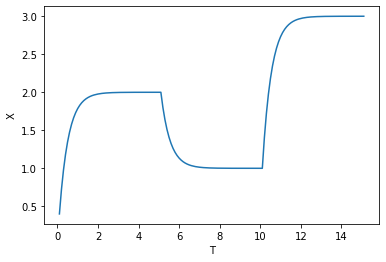

In [30]:
plt1 = sns.lineplot(x="T", y="X", data=df1) #Plots graph of the effects of X over time

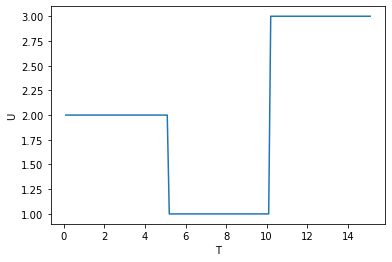

In [31]:
plt2 = sns.lineplot(x="T", y="U", data=df1) # Plots graph on the effect of U Over Time

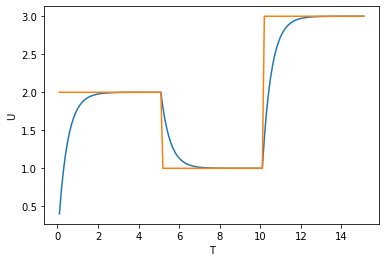

In [32]:
plt1 = sns.lineplot(x="T", y="X", data=df1) #Plots Comparision Graph 
plt2 = sns.lineplot(x="T", y="U", data=df1)
plt1
plt2

## Multiplot for Report 

In [33]:
df2 = Eulers(0,0,1,15,0) # Perform the Eulers method on those parameters and return a pandas dataframe
df3 = Eulers(0,0,0.75,15,0) # Perform the Eulers method on those parameters and return a pandas dataframe
df4 = Eulers(0,0,0.5,15,0) # Perform the Eulers method on those parameters and return a pandas dataframe
df5 = Eulers(0,0,0.25,15,0) # Perform the Eulers method on those parameters and return a pandas dataframe
df6 = Eulers(0,0,0.01,15,0) # Perform the Eulers method on those parameters and return a pandas dataframe
df7 = Eulers(0,0,0.001,15,0) # Perform the Eulers method on those parameters and return a pandas dataframe

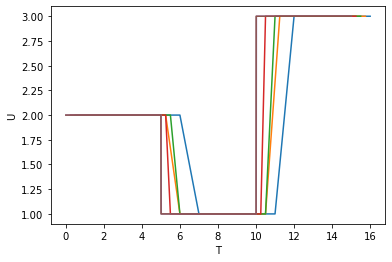

In [34]:
plt3 = sns.lineplot(x="T", y="U", data=df2) #blue
plt4 = sns.lineplot(x="T", y="U", data=df3) #Orange
plt5 = sns.lineplot(x="T", y="U", data=df4) #Green
plt6 = sns.lineplot(x="T", y="U", data=df5) #Red
plt7 = sns.lineplot(x="T", y="U", data=df6) #Purple
plt8 = sns.lineplot(x="T", y="U", data=df7) #Brown

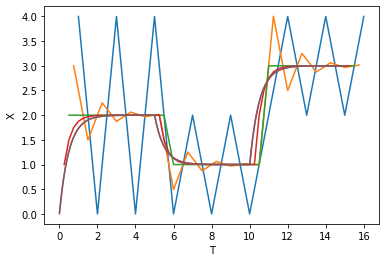

In [35]:
plt9 = sns.lineplot(x="T", y="X", data=df2) #Blue
plt10 = sns.lineplot(x="T", y="X", data=df3) #Orange
plt11 = sns.lineplot(x="T", y="X", data=df4) #Green
plt12 = sns.lineplot(x="T", y="X", data=df5) #Red
plt13 = sns.lineplot(x="T", y="X", data=df6) #Purple
plt14 = sns.lineplot(x="T", y="X", data=df7) #Brown

# Part 2: Adding Noise to Simulation

In [68]:
it = 0
if (it == 0):
    z1 = random.rand(0,2*pi)
    

TypeError: 'float' object cannot be interpreted as an integer